<a href="https://colab.research.google.com/github/kimhwidam/Deep-Learning/blob/main/DL_1%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DL 1일차 - Beginning of Deeplearning

### 무작정 따라해보기

In [5]:
# 데이터 불러오기
import numpy as np

raw_data = np.genfromtxt('/content/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

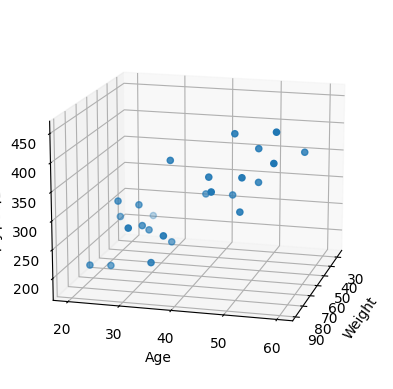

In [6]:
# 데이터 형태 시각화
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

In [7]:
# shape 조정
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)

y_data = y_data.reshape((25,1))

In [8]:
import tensorflow as tf

# 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))
])
model.compile(optimizer='rmsprop', loss='mse')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 학습
hist = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 65887.2266
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 65713.1484
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 65587.0703
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 65481.6562
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 65388.1797
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 65302.6016
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 65222.6719
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 65146.9805
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 65074.5938
Epoch 10/1000
1/1 [==============================] - 0s 12ms/step - loss: 65004.8398
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step - loss: 64937.2461
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 64871.433

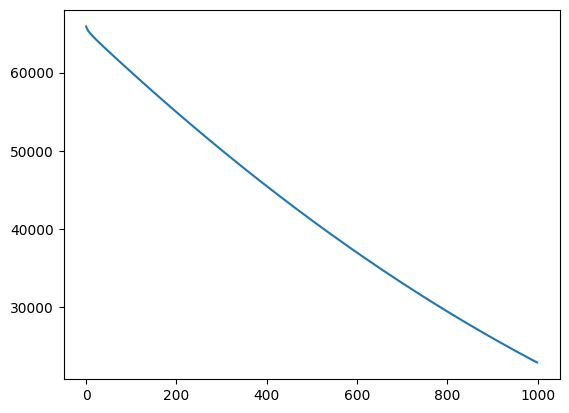

In [11]:
# loss 시각화
plt.plot(hist.history['loss'])

In [12]:
# 예측
model.predict(np.array([100,44]).reshape(1,2))

1/1 [==============================] - 0s 149ms/step


array([[242.45602]], dtype=float32)

In [13]:
# 가중치 확인
W_, b_ = model.get_weights()
W_, b_

(array([[2.0334003 ],
        [0.86618364]], dtype=float32),
 array([1.0039233], dtype=float32))

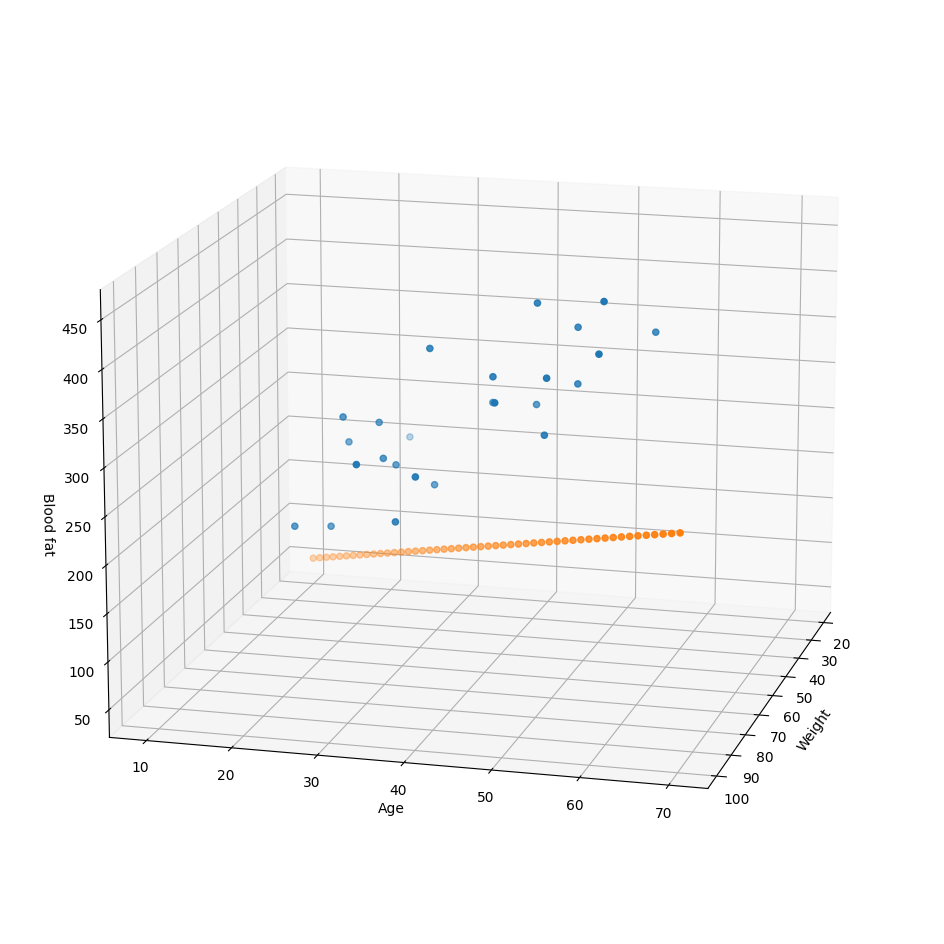

In [14]:
# 모델 확인 위해 데이터 만들고 시각화
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

### XOR

In [15]:
# 데이터 준비
X = np.array( [
    [0,0],
    [1,0],
    [0,1],
    [1,1],
])
y = np.array([[0], [1], [1], [0]])

In [16]:
# 모델 생성
# 직선 하나로 안 되니 2개로 -> sigmoid 활성화 함수로 비선형화
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
hist = model.fit(X, y, epochs=1000, batch_size=1)

Epoch 1/1000
4/4 [==============================] - 1s 5ms/step - loss: 0.2568
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2567
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2565
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2563
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2562
Epoch 6/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2560
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2558
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2558
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2557
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2556
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2556
Epoch 12/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2554
Epoch 13/1000
4/4 [==============================

In [19]:
# 예측
model.predict(X)

1/1 [==============================] - 0s 103ms/step


array([[0.499309  ],
       [0.49719888],
       [0.50157726],
       [0.4990599 ]], dtype=float32)

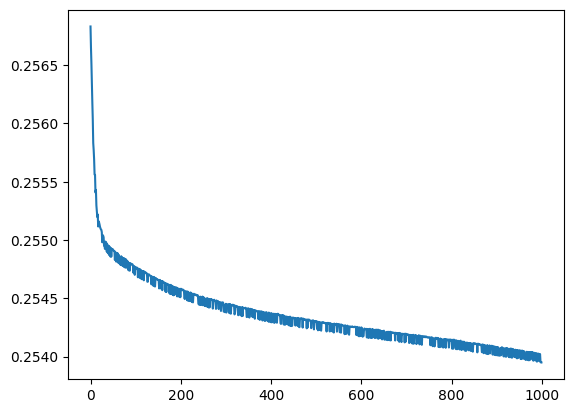

In [20]:
# loss 시각화
plt.plot(hist.history['loss'])

### 분류 - iris

In [21]:
# 데이터 불러오기
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [24]:
enc.categories_

[array([0, 1, 2])]

In [25]:
y_onhot = enc.transform(y.reshape(len(y), 1))
y_onhot[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [26]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onhot, test_size=0.2, random_state=13)

In [27]:
# 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# 학습
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 3s 6ms/step - loss: 1.5433 - accuracy: 0.3417
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1852 - accuracy: 0.2083
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0891 - accuracy: 0.3500
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0652 - accuracy: 0.3917
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0433 - accuracy: 0.3083
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0159 - accuracy: 0.3083
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9850 - accuracy: 0.3417
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9549 - accuracy: 0.6500
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9391 - accuracy: 0.7750
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9155 - accuracy: 0.8333
Epoch 11/100
4/4 [===========

In [29]:
# 모델 평가
model.evaluate(X_test, y_test, verbose=2)

1/1 - 1s - loss: 0.1326 - accuracy: 0.9667 - 504ms/epoch - 504ms/step


[0.13257674872875214, 0.9666666388511658]

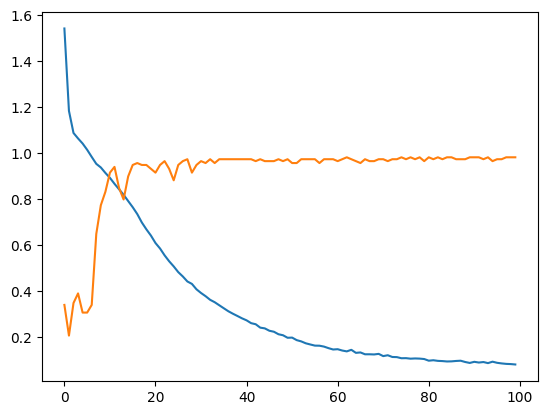

In [30]:
# loss, accuracy 시각화
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

### MNIST 실습

In [31]:
# 데이터 불러오기
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [32]:
# 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 1000)              785000    
                                                                 
 dense_8 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# 학습
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 9s 11ms/step - loss: 0.2224 - accuracy: 0.9355 - val_loss: 0.1072 - val_accuracy: 0.9687
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0856 - accuracy: 0.9743 - val_loss: 0.0743 - val_accuracy: 0.9780
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.0700 - val_accuracy: 0.9782
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0364 - accuracy: 0.9891 - val_loss: 0.0722 - val_accuracy: 0.9784
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.0642 - val_accuracy: 0.9812
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0649 - val_accuracy: 0.9804
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0664 - val_accuracy: 0.9798
Epoch

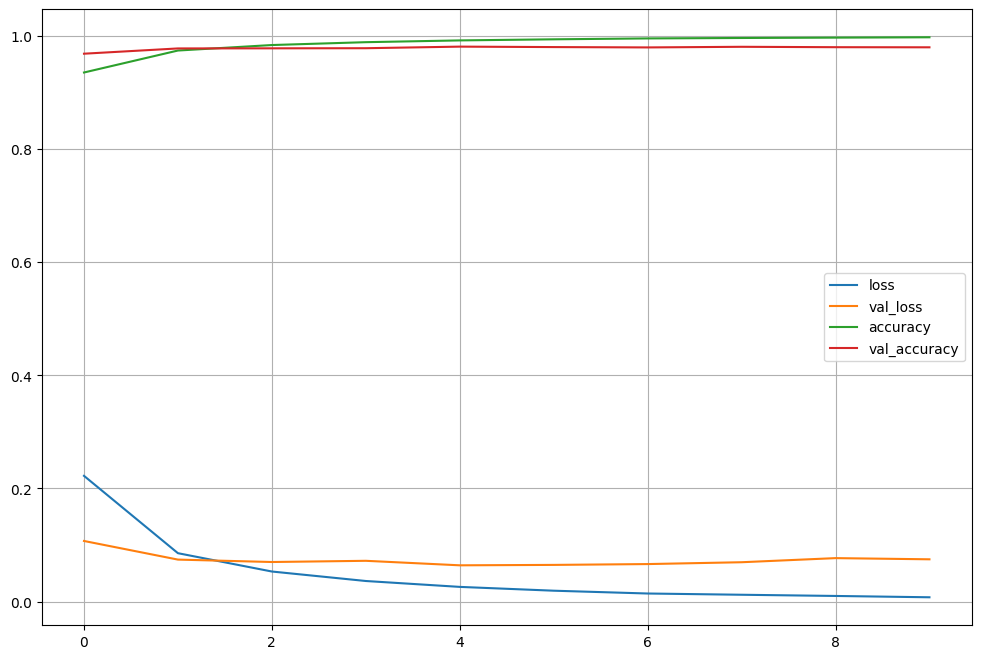

In [34]:
# 모델 평가 시각화
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [35]:
score = model.evaluate(x_test, y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9800


[0.07481040805578232, 0.9800000190734863]

In [36]:
# 예측 결과 저장
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [37]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [38]:
# 잘못 예측한 값 저장
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

200

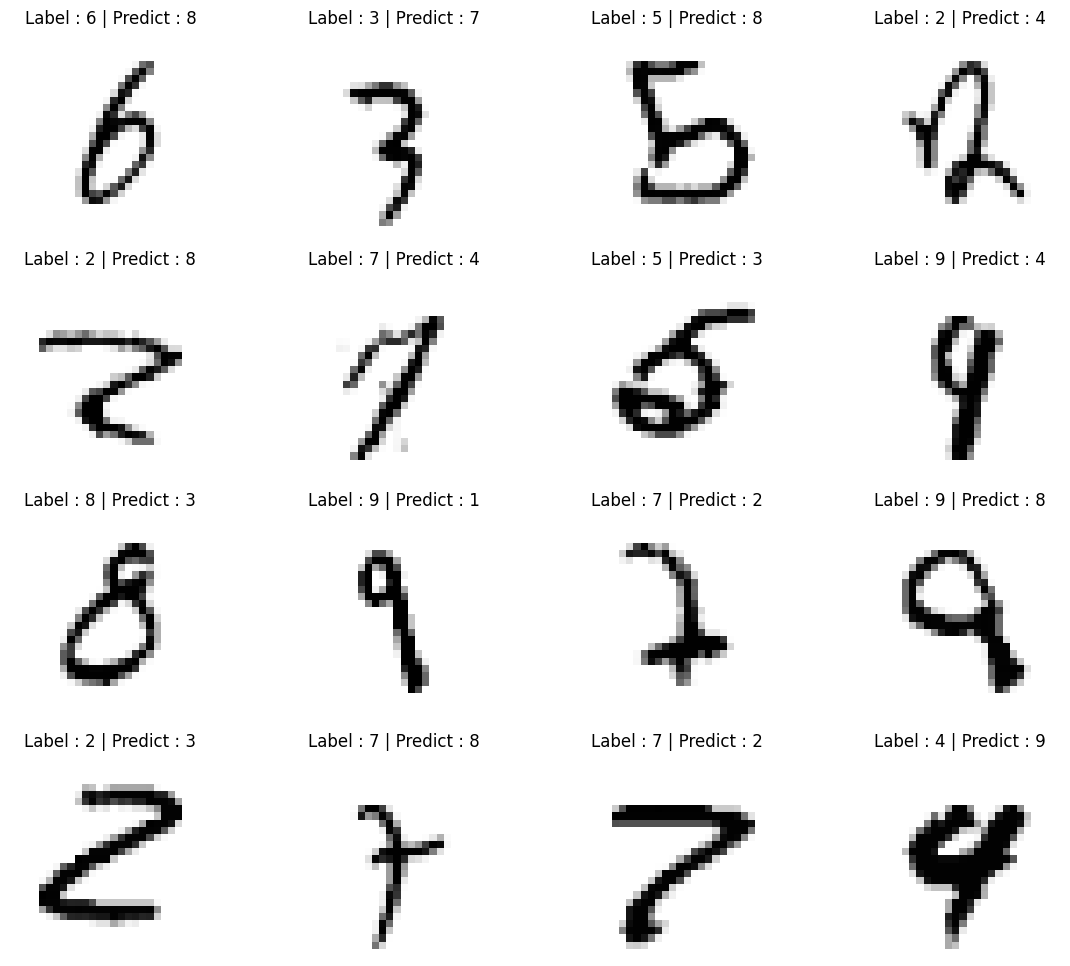

In [39]:
# 틀린 데이터 확인
import random

samples = random.choices(population=wrong_result, k=16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
    plt.title('Label : ' + str(y_test[n]) + ' | Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

### CNN

* 특정 패턴이 있는지 박스로 훓으며 마킹
* Convolution 박스로 밀고 나면 숫자가 나오는데 그 숫자를 활성화 함수(주로 ReLU)에 넣어 나온 값으로 이미지 맵을 새로 그림

풀링: 그림의 중요한 정보로 그림을 줄여나가는 과정

DropOut: 학습 시킬 때, 일부러 정보를 누락시키거나 중간 중간 노드를 끄는 과정

In [40]:
# 데이터 불러오기
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [41]:
# 모델 생성
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [42]:
# 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
hist = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_test, y_test))
print('Fit time : ', time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.1175 - accuracy: 0.9635 - val_loss: 0.0517 - val_accuracy: 0.9834
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0336 - val_accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0350 - val_accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.0312 - val_accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0334 - val_accuracy: 0.9905
Fit time :  45.90106725692749


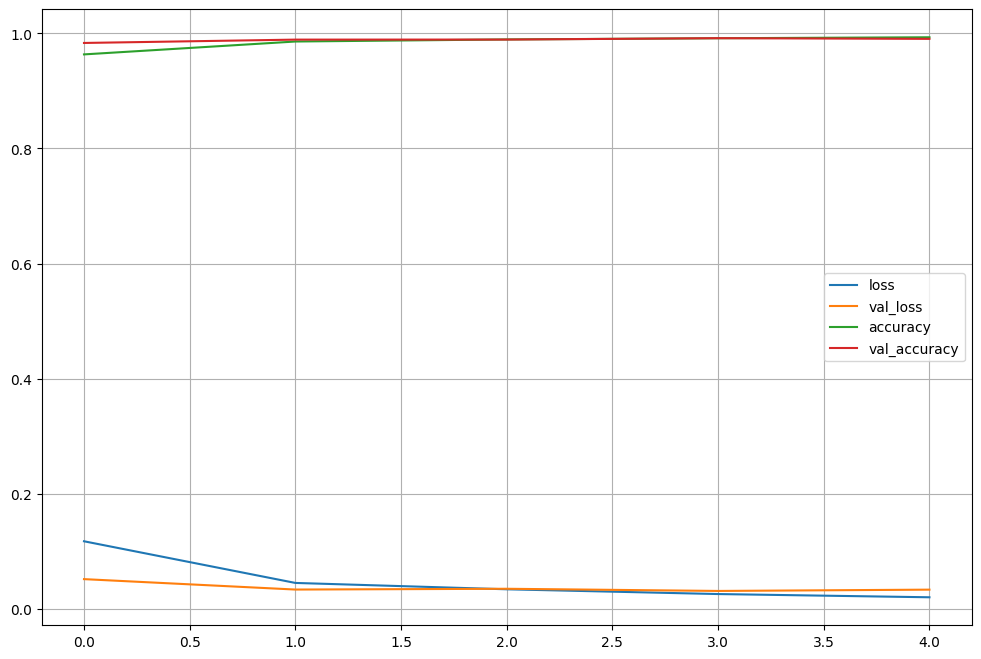

In [44]:
# 모델 평가 시각화
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [43]:
# 정확도
score = model.evaluate(x_test, y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.0334 - accuracy: 0.9905


[0.03341741859912872, 0.9904999732971191]